In [2]:
import pandas as pd

# Tên cột theo mô tả UCI
cols = ['letter','x_box','y_box','width','high','onpix','x_bar','y_bar',
        'x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege','yegvx']

# Đọc dữ liệu từ file (tải từ UCI)
df = pd.read_csv('letter-recognition.csv', header=None, names=cols)

print("Kích thước dữ liệu:", df.shape)
print("5 dòng đầu:")
print(df.head())


Kích thước dữ liệu: (20001, 17)
5 dòng đầu:
   letter  x_box  y_box   width    high   onpix  x_bar  y_bar  x2bar   y2bar  \
0  letter  xbox   ybox   width   height  onpix   xbar   ybar   x2bar  y2bar    
1       T      2      8       3       5       1      8     13      0       6   
2       I      5     12       3       7       2     10      5      5       4   
3       D      4     11       6       8       6     10      6      2       6   
4       N      7     11       6       6       3      5      9      4       6   

    xybar   x2ybr   xy2br   x_ege   xegvy   y_ege   yegvx  
0  xybar   x2ybar  xy2bar  xedge   xedgey  yedge   yedgex  
1       6      10       8       0       8       0       8  
2      13       3       9       2       8       4      10  
3      10       3       7       3       7       3       9  
4       4       4      10       6      10       2       8  


Kiểm tra và thống kê cơ bản

In [3]:
# Kiểm tra giá trị thiếu
print(df.isnull().sum())

# Phân bố lớp
print(df['letter'].value_counts().sort_index())


letter    0
x_box     0
y_box     0
width     0
high      0
onpix     0
x_bar     0
y_bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x_ege     0
xegvy     0
y_ege     0
yegvx     0
dtype: int64
letter
A         789
B         766
C         736
D         805
E         768
F         775
G         773
H         734
I         755
J         747
K         739
L         761
M         792
N         783
O         753
P         803
Q         783
R         758
S         748
T         796
U         813
V         764
W         752
X         787
Y         786
Z         734
letter      1
Name: count, dtype: int64


Tiền xử lý dữ liệu
1. Tách đặc trưng và nhãn 

In [4]:
X = df.drop('letter', axis=1)
y = df['letter']


2. Chia tập huấn luyện và kiểm thử

In [ ]:
import numpy as np

(unique,sses = unique[counts < 2]
 counts) = np.unique(y, return_counts=True)
rare_cla
mask = ~np.isin(y, rare_classes)

X = X[mask]
y = y[mask]


In [7]:
from sklearn.model_selection import train_test_split

# Chia 80% train – 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


3. Chuẩn hóa dữ liệu

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


V. Xây dựng mô hình Naïve Bayes
1. Khởi tạo và huấn luyện

In [9]:
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình
model_nb = GaussianNB()

# Huấn luyện
model_nb.fit(X_train_scaled, y_train)


,priors,None
,var_smoothing,1e-09


2. Dự đoán và đánh giá

Độ chính xác (Accuracy): 0.65225
              precision    recall  f1-score   support

           A       0.85      0.87      0.86       158
           B       0.48      0.72      0.57       153
           C       0.80      0.82      0.81       147
           D       0.61      0.71      0.66       161
           E       0.61      0.38      0.47       154
           F       0.70      0.77      0.73       155
           G       0.59      0.55      0.57       155
           H       0.58      0.35      0.44       147
           I       0.52      0.71      0.60       151
           J       0.83      0.71      0.77       149
           K       0.49      0.49      0.49       148
           L       0.91      0.78      0.84       152
           M       0.69      0.88      0.77       158
           N       0.89      0.68      0.77       157
           O       0.48      0.74      0.58       150
           P       0.87      0.78      0.82       161
           Q       0.53      0.51      0.52     

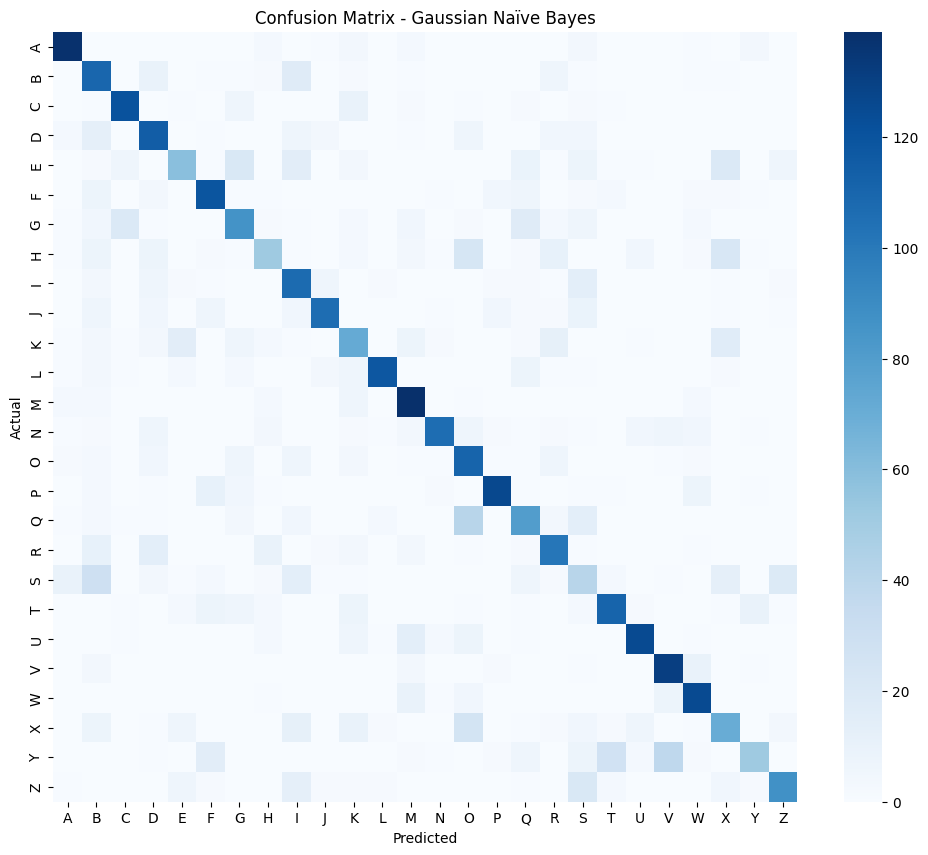

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dự đoán
y_pred = model_nb.predict(X_test_scaled)

# Độ chính xác
acc = accuracy_score(y_test, y_pred)
print("Độ chính xác (Accuracy):", acc)

# Báo cáo chi tiết
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=sorted(y.unique()),
            yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix - Gaussian Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
